In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])    # 0 ~ 9 값을 알아내는 것이므로 10

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [25]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer =tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1)) # 추측한 값(hypothesis)과 실제 값(Y)이 같은지 비교 같으면 True, 다름녀 False

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Epoch: 0001 cost = 2.016928360
Epoch: 0002 cost = 0.842432116
Epoch: 0003 cost = 0.678917364
Epoch: 0004 cost = 0.589498246
Epoch: 0005 cost = 0.549622985
Epoch: 0006 cost = 0.507054125
Epoch: 0007 cost = 0.475704505
Epoch: 0008 cost = 0.453377514
Epoch: 0009 cost = 0.442168728
Epoch: 0010 cost = 0.426278207
Epoch: 0011 cost = 0.410197919
Epoch: 0012 cost = 0.402770131
Epoch: 0013 cost = 0.386946310
Epoch: 0014 cost = 0.380071191
Epoch: 0015 cost = 0.379331470
Label: [6]
Prediction: [6]


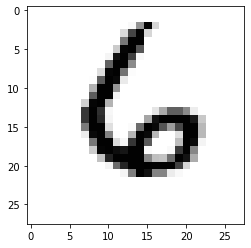

In [27]:
training_epochs = 15  # 1 epoch : 전체 데이터를 한번 학습시킨 것
batch_size = 100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)  # iterations 구하는 식
        # ex. 1000개의 training examples이 있고 batch_size가 500이면 1 epoch을 위해서 2번의 iterations이 필요함
        for i in range(total_batch):  # 2번째 for문이 끝날때마다 1 epoch씩 증가
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)  # 100개의 x, y training data를 읽어옴
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', "%04d" %(epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
    r = random.randint(0, mnist.test.num_examples - 1) # 임의의 값을 하나 읽어옴
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1))) # test data를 읽어옴
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict = {X: mnist.test.images[r:r + 1]}))   # 추측 값과 실제 값(test_data)를 비교
    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest') # test data를 matplotlib를 통해 이미지로 가져옴
    plt.show()